In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
import time
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [193]:
train=pd.read_csv('Train_data_1.csv')

In [194]:
test=pd.read_csv('Test_data_1.csv')

In [195]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [196]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [197]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [199]:
train.shape

(25192, 42)

In [200]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [201]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [202]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='class', ylabel='count'>

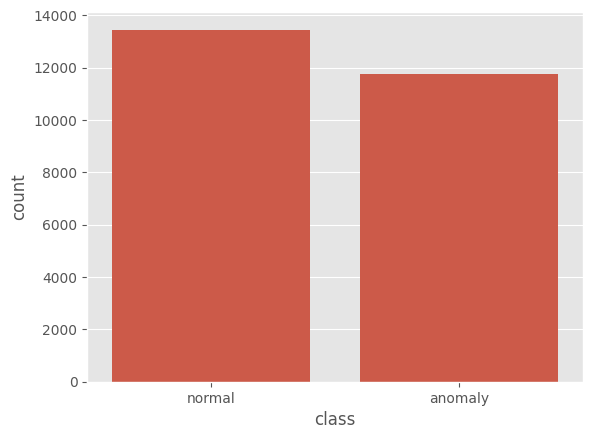

In [203]:
sns.countplot(x=train['class'])

In [204]:
print('Class distribution Training set:')
print(train['class'].value_counts())

Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [205]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [206]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [207]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [208]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [209]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate']

In [210]:
X_train = X_train[selected_features]

In [211]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [212]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [213]:
x_train.shape

(17634, 10)

In [214]:
x_test.shape

(7558, 10)

In [215]:
y_train.shape

(17634,)

In [216]:
y_test.shape

(7558,)

In [217]:
from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)
 

Training time:  0.027460813522338867


In [218]:
start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.0021085739135742188


In [219]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [220]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9417035272768516
Test Score: 0.938872717650172


In [221]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [222]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=1, values=[0.9792273088118549], datetime_start=datetime.datetime(2024, 11, 18, 20, 5, 34, 70775), datetime_complete=datetime.datetime(2024, 11, 18, 20, 5, 34, 488220), params={'KNN_n_neighbors': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [223]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9786208460927753
Test Score: 0.9792273088118549


In [224]:
from sklearn.tree import DecisionTreeClassifier
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.014496803283691406


In [225]:
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.0015475749969482422


In [226]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [227]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=11, state=1, values=[0.9949722148716592], datetime_start=datetime.datetime(2024, 11, 18, 20, 5, 36, 46156), datetime_complete=datetime.datetime(2024, 11, 18, 20, 5, 36, 79113), params={'dt_max_depth': 32, 'dt_max_features': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=11, value=None)


In [228]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9947075946017465


In [229]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
start_time = time.time()
clf_rf.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

# Evaluate Random Forest
rf_train, rf_test = clf_rf.score(x_train, y_train), clf_rf.score(x_test, y_test)
print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")


Training time:  0.6537749767303467
Train Score: 1.0
Test Score: 0.9958983858163535


In [230]:
from sklearn.svm import SVC

# Support Vector Classifier
clf_svm = SVC(kernel='rbf', random_state=SEED)
start_time = time.time()
clf_svm.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

# Evaluate SVM
svm_train, svm_test = clf_svm.score(x_train, y_train), clf_svm.score(x_test, y_test)
print(f"Train Score: {svm_train}")
print(f"Test Score: {svm_test}")


Training time:  0.7306809425354004
Train Score: 0.9675626630373143
Test Score: 0.9653347446414395


In [231]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
clf_nb = GaussianNB()
start_time = time.time()
clf_nb.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time - start_time)

# Evaluate Naive Bayes
nb_train, nb_test = clf_nb.score(x_train, y_train), clf_nb.score(x_test, y_test)
print(f"Train Score: {nb_train}")
print(f"Test Score: {nb_test}")


Training time:  0.00419926643371582
Train Score: 0.8944085289781105
Test Score: 0.8917703096057158


In [232]:
data = [
    ["KNN", KNN_train, KNN_test],
    ["Logistic Regression", lg_train, lg_test],
    ["Decision Tree", dt_train, dt_test],
    ["Random Forest", rf_train, rf_test],
    ["SVM", svm_train, svm_test],
    ["Naive Bayes", nb_train, nb_test]
]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))


╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.978621 │     0.979227 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.941704 │     0.938873 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.994708 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      1        │     0.995898 │
├─────────────────────┼───────────────┼──────────────┤
│ SVM                 │      0.967563 │     0.965335 │
├─────────────────────┼───────────────┼──────────────┤
│ Naive Bayes         │      0.894409 │     0.89177  │
╘═════════════════════╧═══════════════╧══════════════╛


In [233]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier(random_state=SEED)

# KNN
knn = KNeighborsClassifier()

# Logistic Regression Model
lr = LogisticRegression(max_iter=1000, random_state=SEED)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=SEED)

# SVM Model
svm = SVC(kernel='rbf', random_state=SEED)

# Naive Bayes Model
nb = GaussianNB()


In [234]:
from sklearn.model_selection import cross_val_score
models = {
    'KNeighborsClassifier': knn,
    'LogisticRegression': lr,
    'DecisionTreeClassifier': dtc,
    'RandomForestClassifier': rf,
    'SVM': svm,
    'NaiveBayes': nb
}
models['DecisionTreeClassifier']= dtc

In [235]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [236]:
def line(name, sym='*'):
    """Creates a decorative line for model output."""
    return sym * (25 - len(name) // 2)

# Iterate through models and display validation metrics
for name in models:
    print(line(name), name, 'Model Validation', line(name))

    for scorer in ['precision', 'recall']:
        # Calculate mean and standard deviation
        mean = round(np.mean(scores[name][scorer]) * 100, 2)
        stdev = round(np.std(scores[name][scorer]) * 100, 2)
        
        # Print metrics
        print(f"Mean {scorer}: {mean}% ± {stdev}")
    print()  # Blank line for readability


*************** KNeighborsClassifier Model Validation ***************
Mean precision: 98.39% ± 0.41
Mean recall: 98.3% ± 0.44

**************** LogisticRegression Model Validation ****************
Mean precision: 93.57% ± 0.63
Mean recall: 95.65% ± 0.59

************** DecisionTreeClassifier Model Validation **************
Mean precision: 99.45% ± 0.26
Mean recall: 99.46% ± 0.2

************** RandomForestClassifier Model Validation **************
Mean precision: 99.45% ± 0.22
Mean recall: 99.74% ± 0.15

************************ SVM Model Validation ************************
Mean precision: 96.28% ± 0.64
Mean recall: 97.47% ± 0.44

******************** NaiveBayes Model Validation ********************
Mean precision: 86.62% ± 1.17
Mean recall: 94.9% ± 0.56



C:\Users\Reetam\AppData\Local\Temp\ipykernel_21816\1073761507.py:4: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  scores=pd.DataFrame(scores).swapaxes("index", "columns")*100


<Axes: >

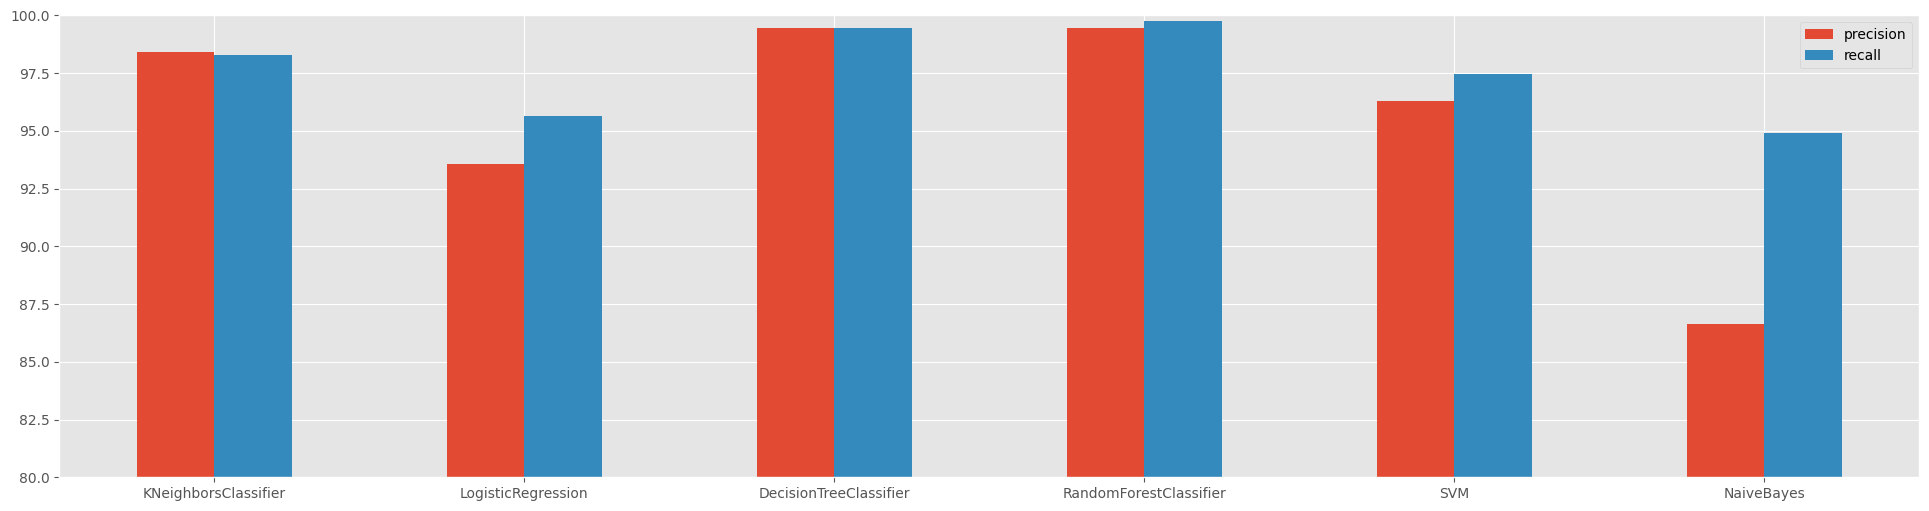

In [237]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [238]:
preds = {
    'KNeighborsClassifier': knn,
    'LogisticRegression': lr,
    'DecisionTreeClassifier': dtc,
    'RandomForestClassifier': rf,
    'SVM': svm,
    'NaiveBayes': nb
}


In [239]:
# Initialize the predictions dictionary
preds = {}

# Train each model and store predictions
for name in models:
    print(f"Training {name}...")
    models[name].fit(x_train, y_train.values.ravel())  # Ensure y_train is properly flattened
    preds[name] = models[name].predict(x_test)        # Store predictions for x_test
    print(f"{name} training and predictions complete.\n")

print("All model predictions are complete.")


Training KNeighborsClassifier...
KNeighborsClassifier training and predictions complete.

Training LogisticRegression...
LogisticRegression training and predictions complete.

Training DecisionTreeClassifier...
DecisionTreeClassifier training and predictions complete.

Training RandomForestClassifier...
RandomForestClassifier training and predictions complete.

Training SVM...
SVM training and predictions complete.

Training NaiveBayes...
NaiveBayes training and predictions complete.

All model predictions are complete.


In [240]:
preds = {}
for name, model in models.items():
    model.fit(x_train, y_train.values.ravel())
    preds[name] = model.predict(x_test)


In [241]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def line(name, sym="*"):
    """Creates a decorative line for model output."""
    return sym * (25 - len(name) // 2)

# Define target labels
target_names = ["normal", "anomaly"]

# Model testing loop
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    
    # Display confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds[name]))
    
    # Decorative line
    print(line(name, '-'))
    
    # Display classification report
    print("Classification Report:")
    print(classification_report(y_test, preds[name], target_names=target_names))
    print()  # Blank line for readability


*************** KNeighborsClassifier Model Testing ***************
Confusion Matrix:
[[3423   75]
 [  57 4003]]
---------------
Classification Report:
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98      3498
     anomaly       0.98      0.99      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558


**************** LogisticRegression Model Testing ****************
Confusion Matrix:
[[3223  275]
 [ 187 3873]]
----------------
Classification Report:
              precision    recall  f1-score   support

      normal       0.95      0.92      0.93      3498
     anomaly       0.93      0.95      0.94      4060

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558


************** DecisionTreeClassifier Mod

<Axes: >

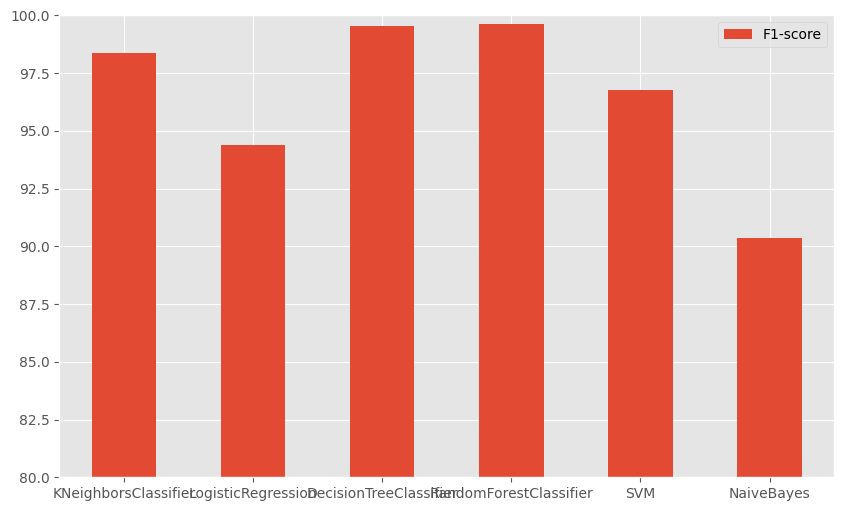

In [242]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

Model Comparison Table:
╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╕
│    │ Model               │   Accuracy │   Precision │   Recall │   F1 Score │   Average Score │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╡
│  0 │ Logistic Regression │    93.8873 │     93.3703 │  95.3941 │    94.3713 │         94.2558 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  1 │ Random Forest       │    99.5237 │     99.4592 │  99.6552 │    99.5571 │         99.5488 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  2 │ SVM                 │    96.5335 │     96.4985 │  97.069  │    96.7829 │         96.721  │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  3 │ KNN                 │    98.2535 │     98.1609 │  98.5961 │    98.378  │         98.347

<Figure size 2400x1200 with 0 Axes>

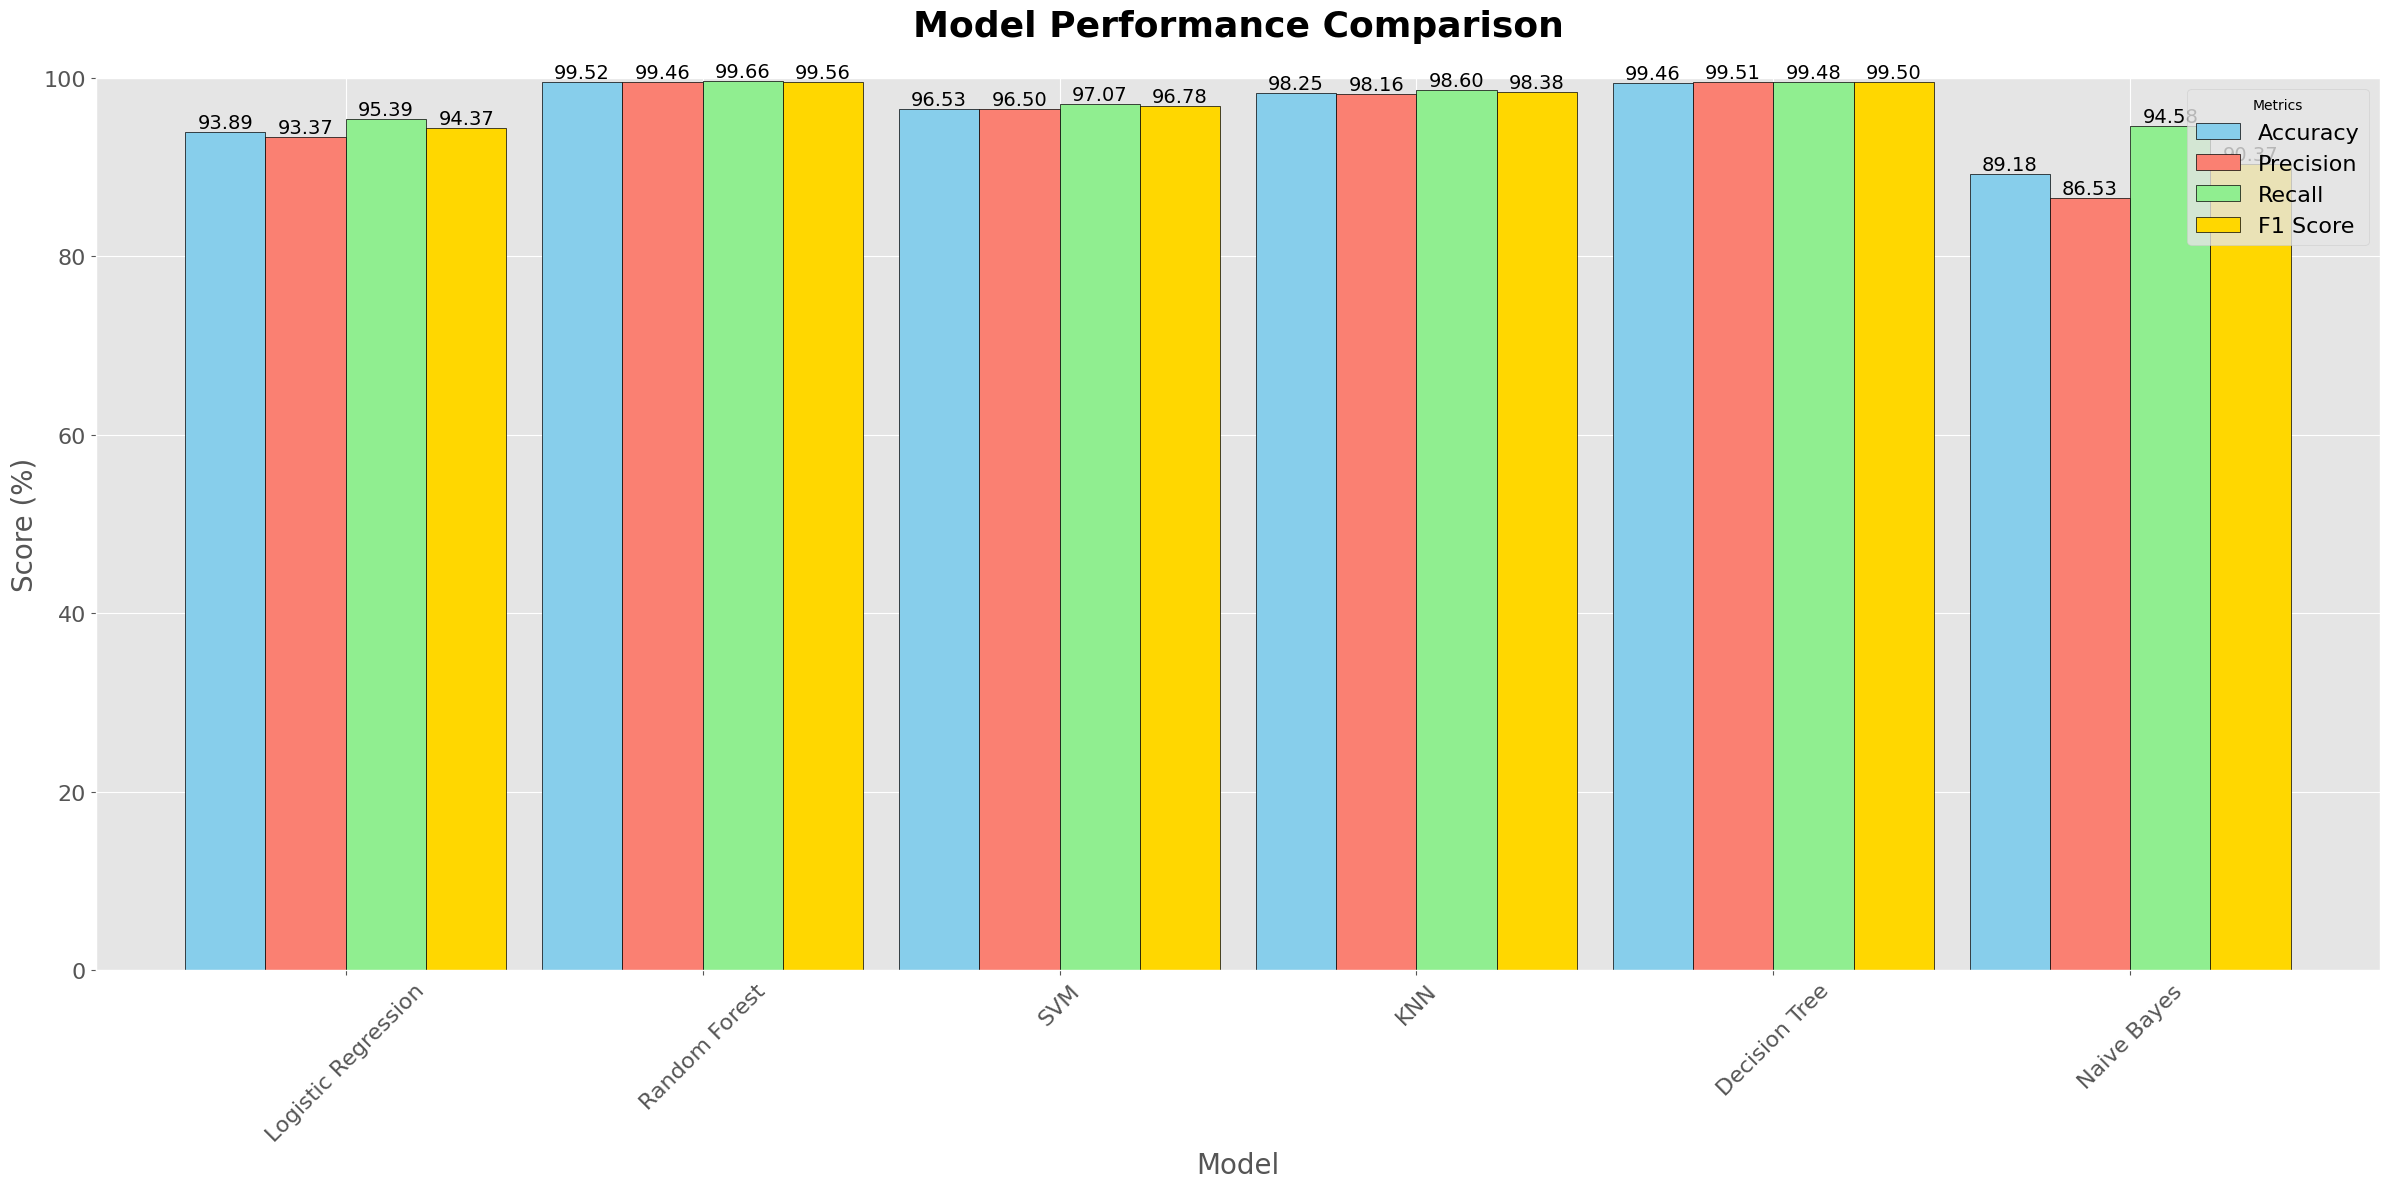


Best Model by Accuracy: Random Forest with an Accuracy of 99.52%
Best Model by Precision: Decision Tree with a Precision of 99.51%
Best Model by Recall: Random Forest with a Recall of 99.66%
Best Model by F1 Score: Random Forest with an F1 Score of 99.56%
Best Model Overall: Random Forest with an Average Score of 99.55%


In [243]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Initialize dictionary to store metrics for each model
model_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Average Score': []  # Column for the average score
}

# Define models dictionary, ensure all models are listed
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    # Add any additional models here
}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Make predictions

    # Compute each metric
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, pos_label=1) * 100
    recall = recall_score(y_test, y_pred, pos_label=1) * 100
    f1 = f1_score(y_test, y_pred, pos_label=1) * 100

    # Append model name and metrics to the dictionary
    model_metrics['Model'].append(name)
    model_metrics['Accuracy'].append(accuracy)
    model_metrics['Precision'].append(precision)
    model_metrics['Recall'].append(recall)
    model_metrics['F1 Score'].append(f1)

    # Calculate the average score and add to dictionary
    avg_score = (accuracy + precision + recall + f1) / 4
    model_metrics['Average Score'].append(avg_score)

# Create a DataFrame to display the metrics for each model
metrics_df = pd.DataFrame(model_metrics)

# Display metrics table
print("Model Comparison Table:")
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid'))

# Set style and plot the bar graph
plt.style.use('ggplot')

# Increase the figure size for an even larger graph
plt.figure(figsize=(24, 12))  # Adjust the size further for a larger plot

# Plot metrics with custom colors and labels
ax = metrics_df.set_index('Model').iloc[:, :-1].plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'],
                                                     figsize=(24, 12), ylim=(0, 100), edgecolor='black', width=0.9)  # Increased width

# Title with larger font size and adjusted position
plt.title("Model Performance Comparison", fontsize=26, weight='bold', pad=30)  # Increased font size and padding for title
plt.ylabel("Score (%)", fontsize=20)  # Increased font size for ylabel
plt.xlabel("Model", fontsize=20)  # Increased font size for xlabel
plt.xticks(rotation=45, fontsize=16)  # Increased font size for x-axis labels
plt.yticks(fontsize=16)  # Increased font size for y-axis labels
plt.legend(loc="upper right", fontsize=16, title="Metrics")

# Adding data labels on each bar for readability
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=14)  # Increased font size for data labels

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels and title
plt.show()

# Identifying the best model for each metric
best_accuracy_model = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']
best_accuracy_score = metrics_df['Accuracy'].max()

best_precision_model = metrics_df.loc[metrics_df['Precision'].idxmax(), 'Model']
best_precision_score = metrics_df['Precision'].max()

best_recall_model = metrics_df.loc[metrics_df['Recall'].idxmax(), 'Model']
best_recall_score = metrics_df['Recall'].max()

best_f1_model = metrics_df.loc[metrics_df['F1 Score'].idxmax(), 'Model']
best_f1_score = metrics_df['F1 Score'].max()

# Identify the best model based on the average score
best_average_index = metrics_df['Average Score'].idxmax()
best_average_model = metrics_df['Model'][best_average_index]
best_average_score = metrics_df['Average Score'].max()

# Printing the best model for each metric and the average score
print(f"\nBest Model by Accuracy: {best_accuracy_model} with an Accuracy of {best_accuracy_score:.2f}%")
print(f"Best Model by Precision: {best_precision_model} with a Precision of {best_precision_score:.2f}%")
print(f"Best Model by Recall: {best_recall_model} with a Recall of {best_recall_score:.2f}%")
print(f"Best Model by F1 Score: {best_f1_model} with an F1 Score of {best_f1_score:.2f}%")
print(f"Best Model Overall: {best_average_model} with an Average Score of {best_average_score:.2f}%")
